# **SIMPLE LINEAR REGRESSION**

Root Mean Squared Error (RMSE): 27.996705993965602
Mean Squared Error (MSE): 783.8155465125494
Mean Absolute Error (MAE): 21.825571528856727


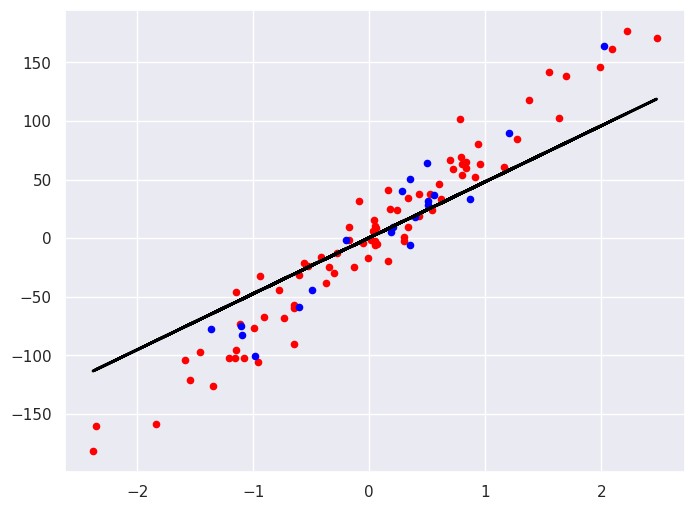

In [29]:
import numpy as np

class SimpleLinearRegression:
  def __init__(self, learning_rate=0.001,n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bais = None

  def fit(self , x , y):
    n_samples , n_features = x.shape

    #init parameters
    self.weights = np.zeros(n_features)
    self.bais = 0

    #gradient descent
    for _ in range(self.n_iters):
      y_predicted = np.dot(x , self.weights) + self.bais
      #compute gradient
      dw = (1/n_samples) * np.dot(x.T , (y_predicted - y))
      db = (1/n_samples) * np.sum(y_predicted - y)

      #Update parameters
      self.weights -= self.lr * dw
      self.bais -= self.lr * db

  def predict(self , x):
    y_approximated = np.dot(x , self.weights) + self.bais
    return y_approximated

  def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

  def mae(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

#Testing
if __name__ == "__main__":
  #imports
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn import datasets

  x , y = datasets.make_regression(
      n_samples=100 , n_features=1 , noise = 20 , random_state=4
  )

  x_train , x_test , y_train , y_test = train_test_split(
      x , y , test_size = 0.2 , random_state=1234
  )


  regressor = SimpleLinearRegression(learning_rate=0.001,n_iters=1000)
  regressor.fit(x_train , y_train)
  predictions = regressor.predict(x_test)

  mse = regressor.mse(y_test, predictions)
  rmse = np.sqrt(mse)
  print("Root Mean Squared Error (RMSE):", rmse)

  print("Mean Squared Error (MSE):", mse)

  mae = regressor.mae(y_test, predictions)
  print("Mean Absolute Error (MAE):", mae)

  y_pred_line = regressor.predict(x)
  # cmap = plt.get_cmap("viridis")
  fig = plt.figure(figsize=(8,6))
  m1 = plt.scatter(x_train , y_train , color="red" , s=20)
  m2 = plt.scatter(x_test , y_test , color="blue" , s=20)
  plt.plot(x , y_pred_line , color="black" , linewidth =2,label = "Prediction")
  plt.show()

In [ ]:
import numpy as np

class SimpleLinearReg:
  def __init__(self, learning_rate= 0.001,n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    se


# MULTIPLE LINEAR REGRESSION

In [ ]:
# import numpy as np
# from sklearn.datasets import load_diabetes
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# class MultipleLinearRegression:
#     def __init__(self, learning_rate=0.01, n_iters=1000):
#         self.learning_rate = learning_rate
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         for _ in range(self.n_iters):
#             y_predicted = np.dot(X, self.weights) + self.bias

#             # Compute gradients
#             dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1/n_samples) * np.sum(y_predicted - y)

#             # Update parameters using gradient descent
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db

#     def predict(self, X):
#         return np.dot(X, self.weights) + self.bias

# # Load the diabetes dataset
# diabetes = load_diabetes()
# X, y = diabetes.data, diabetes.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Normalize the data for better convergence
# mean = np.mean(X_train, axis=0)
# std = np.std(X_train, axis=0)
# X_train = (X_train - mean) / std
# X_test = (X_test - mean) / std

# # Create and train the multiple linear regression model
# model = MultipleLinearRegression(learning_rate=0.01, n_iters=1000)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Calculate and print the Mean Squared Error (MSE) for evaluation
# mse = np.mean((y_test - predictions) ** 2)
# print("Mean Squared Error (MSE):", mse)

# # Plot actual vs. predicted values with different colors
# plt.scatter(y_test, y_test, color='blue', label='Actual Values')
# plt.scatter(y_test, predictions, color='red', label='Predicted Values')
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Actual vs. Predicted Values")
# plt.legend()
# plt.show()


# # new_data contains the feature values for the new data points
# new_data = np.array([[0.05, -0.04, 0.02, -0.02, 0.05, 0.05, -0.04, -0.04, -0.05, -0.01],  # Feature values for new data point 1
#                      [0.01, 0.03, 0.03, 0.03, -0.03, 0.05, 0.03, -0.03, -0.02, 0.03]])  # Feature values for new data point 2

# # Normalize the new data using the same mean and standard deviation as the training data
# new_data_normalized = (new_data - mean) / std

# # Predict the target variable for the new data points
# predictions_new_data = model.predict(new_data_normalized)

# print("Predicted target variable for new data points:")
# for i, pred in enumerate(predictions_new_data):
#     print(f"Data point {i+1}: {pred:.2f}")

## **MULTIPLE LINEAR REGRESSION USING OLS**

In [28]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

datasets = load_diabetes()
x,y = datasets.data, datasets.target

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

lr = MeraLR()
lr.fit(X_train, y_train)

print(X_train.shape)

y_pred = lr.predict(X_test)
print("R-squared score on the test set:", r2_score(y_test, y_pred))

# Predict new data
new_data = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]])
new_data_prediction = lr.predict(new_data)
print("Predicted output for new data:", new_data_prediction)

print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

(353, 10)
R-squared score on the test set: 0.43993386615689634
Predicted output for new data: [1326.63482779]
Coefficients: [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
Intercept: 151.88331005254165


## **LOGISTIC REGRESSION**

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split

# class LogisticRegressionScratch:
#     def __init__(self, learning_rate=0.01, n_iters=1000):
#         self.learning_rate = learning_rate
#         self.n_iters = n_iters
#         self.weights = None
#         self.bias = None

#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))

#     def fit(self, X, y):
#         n_samples, n_features = X.shape
#         self.weights = np.zeros(n_features)
#         self.bias = 0

#         for _ in range(self.n_iters):
#             linear_model = np.dot(X, self.weights) + self.bias
#             y_predicted = self.sigmoid(linear_model)

#             # Compute gradients
#             dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1/n_samples) * np.sum(y_predicted - y)

#             # Update parameters using gradient descent
#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db

#     def predict(self, X):
#         linear_model = np.dot(X, self.weights) + self.bias
#         y_predicted = self.sigmoid(linear_model)
#         y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
#         return y_predicted_cls

# # Create a synthetic binary classification dataset using make_classification
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# # Create and train the Logistic Regression model
# model = LogisticRegressionScratch(learning_rate=0.01, n_iters=1000)
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Calculate accuracy for evaluation
# accuracy = np.mean(y_pred == y_test)
# print("Accuracy:", accuracy)

# # Plot the decision boundary
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# # Convert Z to a NumPy array before reshaping
# Z = np.array(Z)
# Z = Z.reshape(xx.shape)

# plt.contourf(xx, yy, Z, alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Logistic Regression Decision Boundary')
# plt.show()


# # Assuming `new_data` contains the feature values for the new data points
# new_data = np.array([[0.5, 1.0],  # Feature values for new data point 1
#                      [-1.0, 0.5]])  # Feature values for new data point 2

# # Predict the target variable for the new data points
# predictions_new_data = model.predict(new_data)

# print("Predicted classes for new data points:")
# for i, pred in enumerate(predictions_new_data):
#     print(f"Data point {i+1}: Class {pred}")

## **LOGISTIC REGRESSION USING PERCEPTRON TRIC**

[1.31574959 0.18722522]
0.9


(-3.0, 2.0)

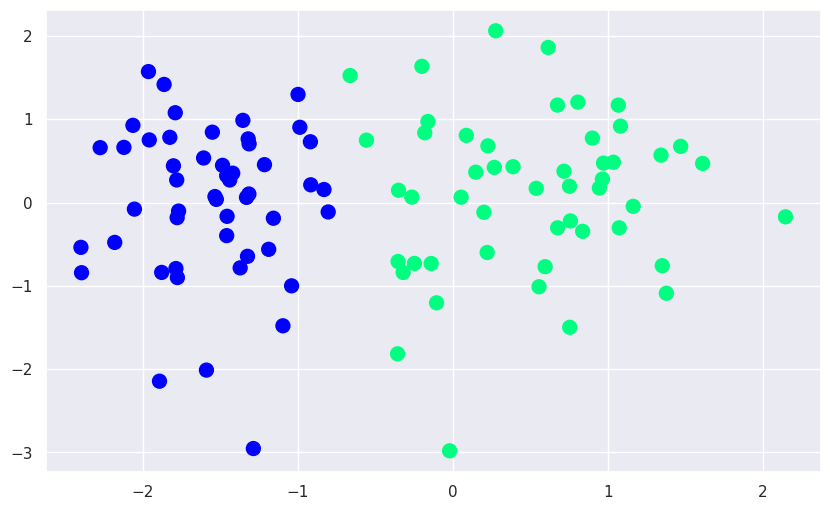

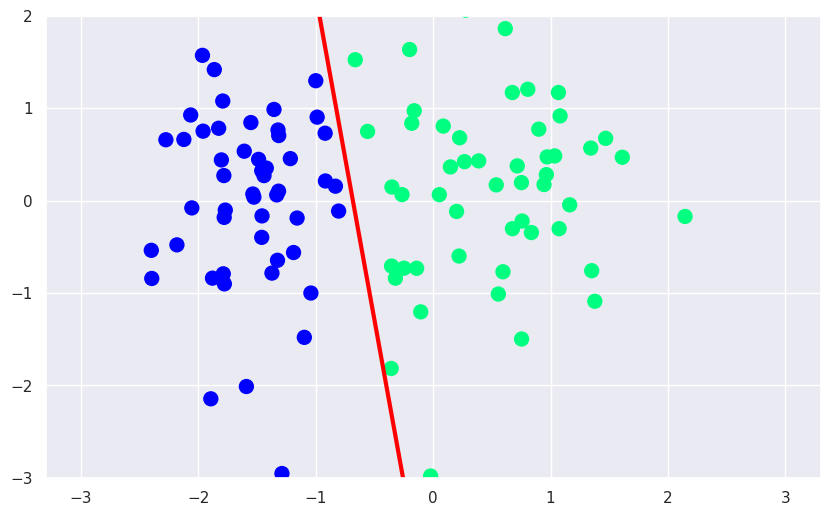

In [27]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

def perceptron(X,y):

    x = np.insert(X,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]

    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

intercept_,coef_ = perceptron(x,y)

print(coef_)
print(intercept_)

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## **IMPLEMENT SUPPORT VECTOR MACHINE **

In [ ]:
# import numpy as np
# from sklearn.metrics import accuracy_score

# class SVM:
#   def __init__(self , learning_rate = 0.001 , lambda_param = 0.01 , n_iters = 1000):
#     self.lr = learning_rate
#     self.lambda_param = lambda_param
#     self.n_iters = n_iters
#     self.w = None
#     self.b = None

#   def fit(self , x , y):
#     n_samples , n_features = x.shape

#     y_ = np.where(y <=0,-1,1)

#     self.w = np.zeros(n_features)
#     self.b = 0

#     for _ in range(self.n_iters):
#       for idx , x_i in enumerate(x):
#         condition = y_[idx] * (np.dot(x_i , self.w) - self.b) >=1
#         if condition:
#           self.w -= self.lr * (2 * self.lambda_param * self.w)
#         else:
#           self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i , y_[idx]))
#           self.b -= self.lr * y_[idx]

#   def predict(self , x):
#     approx = np.dot(x , self.w) - self.b
#     return np.sign(approx)

# #Testing
# if __name__ == "__main__":
#   # imports
#   from sklearn import datasets
#   import matplotlib.pyplot as plt

#   x ,y = datasets.make_blobs(
#       n_samples=50 , n_features=2 , centers = 2, cluster_std=1.05 , random_state=40
#   )

#   y = np.where(y == 0, -1 , 1)

#   clf = SVM()
#   clf.fit(x,y)
#   predictions = clf.predict(x)
#   accuracy = accuracy_score(y, predictions)
#   print("Accuracy:" , accuracy)

#   print(clf.w , clf.b)

#   # Assuming new_data contains the feature values for the new data points
# new_data = np.array([[1.5, 2.5],  # Feature values for new data point 1
#                      [3.5, 4.0],  # Feature values for new data point 2
#                      [0.5, 1.0]])  # Feature values for new data point 3

# # Predict classes for new data points
# new_data_predictions = clf.predict(new_data)
# print("Predicted classes for new data points:")
# print(new_data_predictions)


# # Plot the data points and decision boundary
# plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, label='Training Data')
# plt.scatter(new_data[:, 0], new_data[:, 1], c=new_data_predictions, cmap=plt.cm.Paired, marker='x', label='New Data')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')

# # Plot the decision boundary
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()

# # Create grid to evaluate model
# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Z = clf.predict(xy).reshape(XX.shape)

# # Plot decision boundary and margins
# ax.contourf(XX, YY, Z, colors=['blue', 'orange'], levels=[-1, 0, 1], alpha=0.5)
# ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

# plt.title('SVM Decision Boundary')
# plt.legend()
# plt.show()

## **LINEAR SVM**

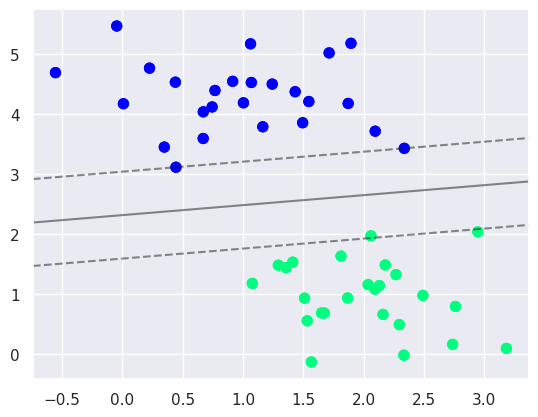

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);




```
# This is formatted as code
```

## **GaussianNaiveBayes**

In [25]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_prior = {}
        self.mean = {}
        self.variance = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_prior[c] = X_c.shape[0] / X.shape[0]
            self.mean[c] = X_c.mean(axis=0)
            self.variance[c] = X_c.var(axis=0)

    def calculate_likelihood(self, x, mean, variance):
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return np.prod((1 / np.sqrt(2 * np.pi * variance)) * exponent)

    def predict(self, X):
        predictions = []

        for x in X:
            posteriors = []
            for c in self.classes:
                likelihood = self.calculate_likelihood(x, self.mean[c], self.variance[c])
                posterior = self.class_prior[c] * likelihood
                posteriors.append(posterior)

            predicted_class = self.classes[np.argmax(posteriors)]
            predictions.append(predicted_class)

        return np.array(predictions)

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy for evaluation
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Predict new data
# Assuming new_data contains the feature values for the new data points
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  # Feature values for new data point 1
                     [6.3, 2.5, 5.0, 1.9]])  # Feature values for new data point 2
new_data_prediction = model.predict(new_data)
print("Predicted classes for new data points:")
print(new_data_prediction)

Accuracy: 1.0
Predicted classes for new data points:
[0 2]


## **CategoricalNaiveBayes**

In [24]:
import numpy as np

class CategoricalNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_prior = {}
        self.feature_prob = {}

        for c in self.classes:
            X_c = X[y == c]
            self.class_prior[c] = X_c.shape[0] / X.shape[0]
            self.feature_prob[c] = {}
            for feature_idx in range(X.shape[1]):
                feature_values, feature_counts = np.unique(X_c[:, feature_idx], return_counts=True)
                total_count = len(X_c)
                self.feature_prob[c][feature_idx] = {}
                for value, count in zip(feature_values, feature_counts):
                    self.feature_prob[c][feature_idx][value] = (count + 1) / (total_count + len(feature_values))

    def calculate_likelihood(self, x, feature_prob):
        likelihood = 1.0
        for feature_idx, value in enumerate(x):
            likelihood *= feature_prob[feature_idx].get(value, 1e-6)  # Use a small smoothing factor for unseen values
        return likelihood

    def predict(self, X):
        predictions = []

        for x in X:
            posteriors = []
            for c in self.classes:
                likelihood = self.calculate_likelihood(x, self.feature_prob[c])
                posterior = self.class_prior[c] * likelihood
                posteriors.append(posterior)

            predicted_class = self.classes[np.argmax(posteriors)]
            predictions.append(predicted_class)

        return np.array(predictions)

# Create an example dataset with categorical features and labels
# Replace this with your own dataset
X = np.array([['Sunny', 'Hot', 'High', 'Weak'],   # Feature values for data point 1
              ['Sunny', 'Hot', 'High', 'Strong'], # Feature values for data point 2
              ['Overcast', 'Hot', 'High', 'Weak'], # Feature values for data point 3
              ['Rain', 'Mild', 'High', 'Weak'],    # Feature values for data point 4
              ['Rain', 'Cool', 'Normal', 'Weak'],  # Feature values for data point 5
              ['Rain', 'Cool', 'Normal', 'Strong'],# Feature values for data point 6
              ['Overcast', 'Cool', 'Normal', 'Strong'],# Feature values for data point 7
              ['Sunny', 'Mild', 'High', 'Weak'],   # Feature values for data point 8
              ['Sunny', 'Cool', 'Normal', 'Weak'], # Feature values for data point 9
              ['Rain', 'Mild', 'Normal', 'Weak'],  # Feature values for data point 10
              ['Sunny', 'Mild', 'Normal', 'Strong'], # Feature values for data point 11
              ['Overcast', 'Mild', 'High', 'Strong'], # Feature values for data point 12
              ['Overcast', 'Hot', 'Normal', 'Weak'], # Feature values for data point 13
              ['Rain', 'Mild', 'High', 'Strong']])   # Feature values for data point 14

y = np.array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])  # Labels

# Create and train the Categorical Naive Bayes model
model = CategoricalNaiveBayes()
model.fit(X, y)

# Predict new data
# Assuming new_data contains the feature values for the new data points
new_data = np.array([['Sunny', 'Hot', 'High', 'Weak'],  # Feature values for new data point 1
                     ['Overcast', 'Mild', 'Normal', 'Weak']])  # Feature values for new data point 2
new_data_prediction = model.predict(new_data)
print("Predicted classes for new data points:")
print(new_data_prediction)

Predicted classes for new data points:
['No' 'Yes']


## **K-MEANS CLUSTERING ALGORITHM**

Predicted clusters for new data points:
[2 2 2]


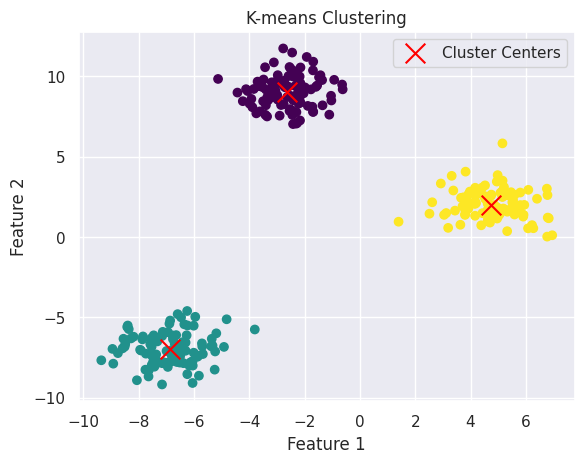

In [21]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, X):
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[random_indices]

    def assign_clusters(self, X, centroids):
        distances = np.sqrt(((X - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, clusters):
        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(self.n_clusters)])
        return new_centroids

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            old_centroids = np.copy(self.centroids)
            clusters = self.assign_clusters(X, self.centroids)
            self.centroids = self.update_centroids(X, clusters)
            if np.all(old_centroids == self.centroids):
                break

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=0)

# Generate example data using make_blobs from sklearn
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Create and train the KMeans model
model = KMeans(n_clusters=3, max_iters=100)
model.fit(X)

# Predict new data
# Assuming new_data contains the feature values for the new data points
new_data = np.array([[0, 4], [3, 2], [8, 5]])  # Feature values for new data points
new_data_clusters = model.predict(new_data)
print("Predicted clusters for new data points:")
print(new_data_clusters)

# Plot the data and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), cmap='viridis')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.show()

## **PRICIPAL COMPONENT ANALYSIS**

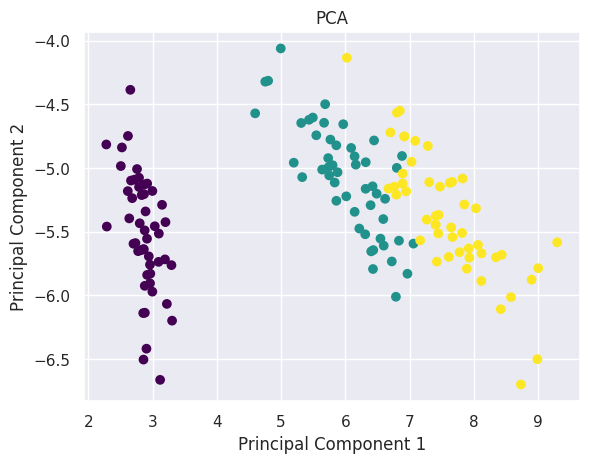

In [23]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        # Compute the mean of each feature in the data
        mean = np.mean(X, axis=0)

        # Center the data by subtracting the mean
        centered_data = X - mean

        # Compute the covariance matrix of the centered data
        covariance_matrix = np.cov(centered_data, rowvar=False)

        # Compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors as the principal components
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        # Project the data onto the principal components
        return np.dot(X, self.components)

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create and train the PCA model
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the new feature space
X_transformed = pca.transform(X)

# Plot the data in the new feature space
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()